In [17]:

import pandas as pd                                                      #For DataFrame
import matplotlib.pyplot as plt                                          #For Plotting Data
import seaborn as sns                                                    #For Plotting Data
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split                     #For Train/Test Splits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
''' Data set:- https://archive.ics.uci.edu/dataset/94/spambase '''

In [2]:
df = pd.read_csv('./spambase/spambase.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
''' Last row indicates if the eamil is SPAM by denoting 1 or 0 '''

In [4]:
df.columns = ['X' + str(i) for i in range(0,len(df.columns)-1)] + ['y']

df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),
    df.y,
    test_size=0.30,
    random_state=1)

trn = X_trn
trn['y'] = y_trn

tst = X_tst
tst['y'] = y_tst

<Axes: xlabel='y', ylabel='count'>

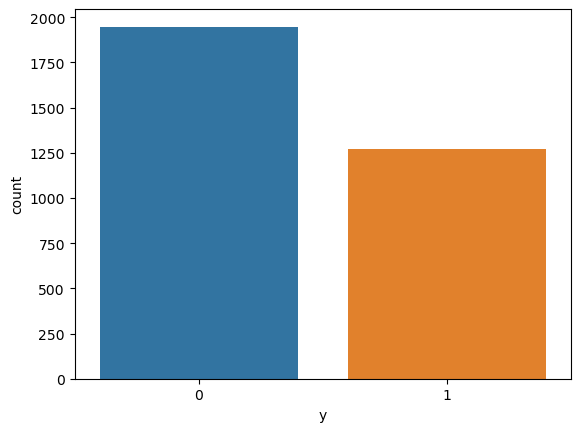

In [6]:
#explore the data
sns.countplot(x='y', data=trn)

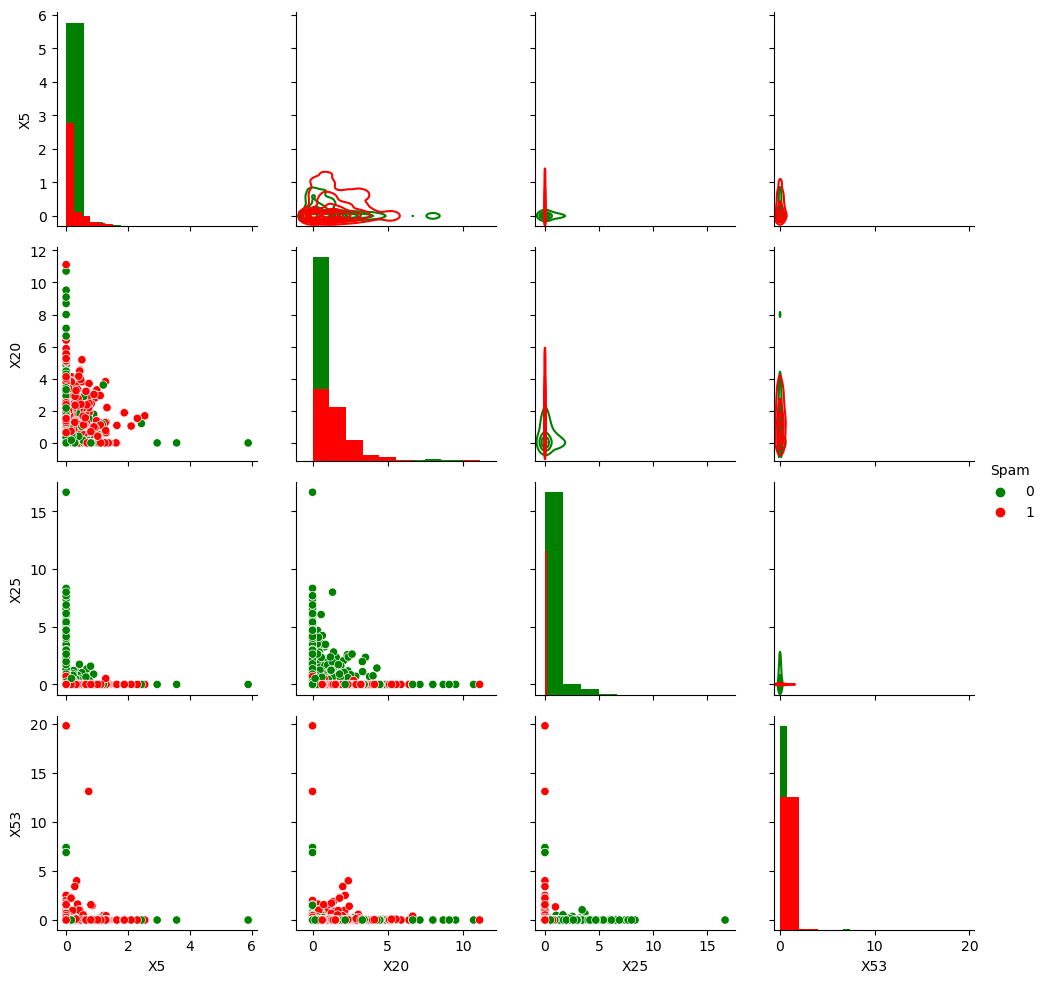

In [8]:
g = sns.PairGrid(
    trn,
    vars=['X5', 'X20','X25', 'X53'],
    hue='y',
    diag_sharey=False,
    palette=['green', 'red'])  # 'Green' represent non-Spam emails  'Red' represent Spam emails 

g.map_diag(plt.hist)

g.map_upper(sns.kdeplot)

g.map_lower(sns.scatterplot)

g.add_legend(title='Spam')

In [7]:
df.to_csv('./spambase/spambase.csv', sep=',', index=False)
trn.to_csv('./spambase/spambase_trn.csv', sep=',', index=False)
tst.to_csv('./spambase/spambase_tst.csv', sep=',', index=False)

In [8]:
trn = pd.read_csv('./spambase/spambase_trn.csv')

X_trn = trn.filter(regex='\d')

y_trn = trn.y

tst = pd.read_csv('./spambase/spambase_tst.csv')

X_tst = tst.filter(regex='\d')

y_tst = tst.y

spam = ['Not Spam', 'Spam']

trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


In [9]:
knn = KNeighborsClassifier(n_neighbors=5) \
    .fit(X_trn, y_trn)

In [10]:
print('Accuracy on training data: ' + str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 86.77%


In [14]:
Knn = KNeighborsClassifier()

param = range(3, 15, 2)

grid = GridSearchCV(Knn, {'n_neighbors': param})

best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_

best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

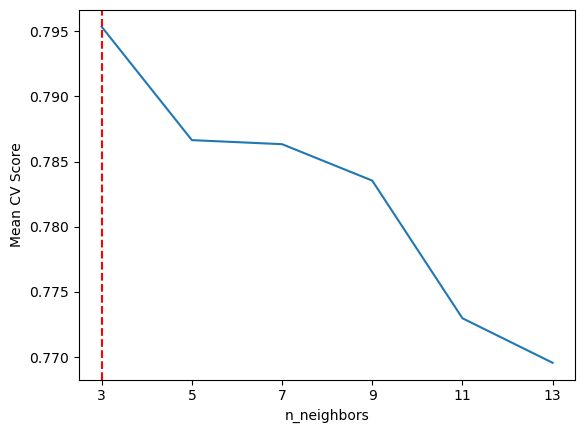

In [20]:
plt.plot(param, grid.cv_results_['mean_test_score'])

plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

plt.axvline(
    x=best_knn.n_neighbors,
    color='red',
    ls='--')

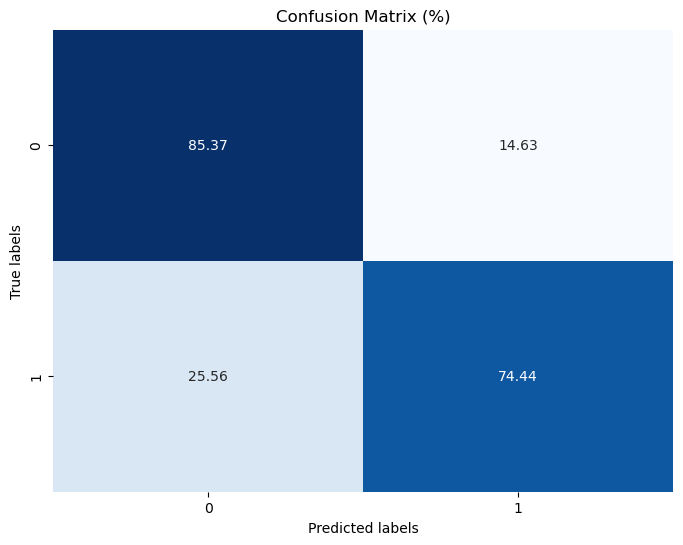

In [32]:
# Compute confusion matrix
#cm = confusion_matrix(y_tst, y_trn)

# Predict on test data
y_pred = best_knn.predict(X_tst)

# Compute confusion matrix
cm = confusion_matrix(y_tst, y_pred)

# Normalize confusion matrix to get percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (%)')
plt.show()


In [29]:
print('Accuracy on testing data: ' + str("{:.2%}".format(best_knn.score(X_tst, y_tst))))

Accuracy on testing data: 81.10%
